In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
import pandas as pd
df = pd.read_csv("Attrition.csv")  
print("csv loaded successfully!")
print(df.head())  
print("Shape:", df.shape)  


csv loaded successfully!
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  S

In [10]:
print(df.isnull().sum())
df = df.drop("EmployeeNumber", axis=1)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
cat_cols = df.select_dtypes(include="object").columns
print("Categorical columns:", cat_cols)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Categorical columns: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [12]:
X = df.drop("Attrition", axis=1)   
y = df["Attrition"]               
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



In [14]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8401360544217688


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8231292517006803


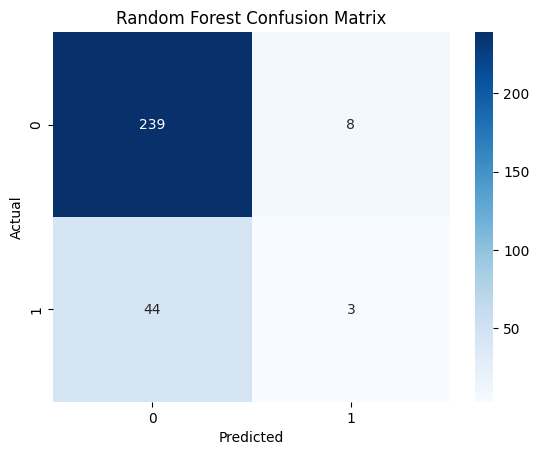

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


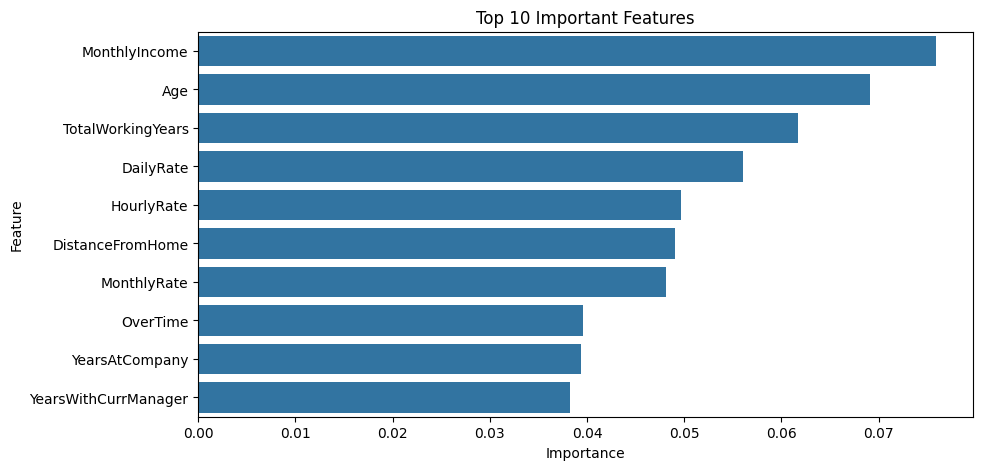

In [17]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [ ]:

import joblib
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
os.makedirs('../BACKEND/models', exist_ok=True)
print("Exporting models for FastAPI backend...")
joblib.dump(rf, r'c:\codddee\RETAINER\BACKEND\models\model.pkl')
print(" Random Forest model saved to BACKEND/models/model.pkl")
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                      'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
feature_columns = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction',
    'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
    'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
numerical_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)
X_for_preprocessing = df.drop(['Attrition', ], axis=1)
preprocessor.fit(X_for_preprocessing)
joblib.dump(preprocessor, '../BACKEND/models/preprocessor.pkl')
print(" Preprocessor saved to BACKEND/models/preprocessor.pkl")
print("\n Testing saved models...")
try:
    loaded_model = joblib.load('../BACKEND/models/model.pkl')
    loaded_preprocessor = joblib.load('../BACKEND/models/preprocessor.pkl')
    print(f" Model type: {type(loaded_model).__name__}")
    print(f" Preprocessor loaded successfully")
    sample_data = X_for_preprocessing.iloc[:1]  
    processed_sample = loaded_preprocessor.transform(sample_data)
    prediction = loaded_model.predict(processed_sample)
    probability = loaded_model.predict_proba(processed_sample)
    
    print(f" Test prediction: {prediction[0]}")
    print(f" Test probability: {probability[0]}")
    print("\n Models exported and tested successfully!")
    print("Your FastAPI backend is ready to use these models!") 
except Exception as e:
    print(f" Error testing models: {e}")
print(f"\n Model expects {len(feature_columns)} features:")
for i, col in enumerate(feature_columns):
    print(f"{i+1:2d}. {col}")
    
print(f"\n📈 Model Performance (from your notebook):")
print(f"Random Forest Accuracy: 82.31%")

Exporting models for FastAPI backend...
✅ Random Forest model saved to BACKEND/models/model.pkl
✅ Preprocessor saved to BACKEND/models/preprocessor.pkl

🔍 Testing saved models...
✅ Model type: RandomForestClassifier
✅ Preprocessor loaded successfully
❌ Error testing models: X has 46 features, but RandomForestClassifier is expecting 33 features as input.

📊 Model expects 33 features:
 1. Age
 2. BusinessTravel
 3. DailyRate
 4. Department
 5. DistanceFromHome
 6. Education
 7. EducationField
 8. EmployeeCount
 9. EnvironmentSatisfaction
10. Gender
11. HourlyRate
12. JobInvolvement
13. JobLevel
14. JobRole
15. JobSatisfaction
16. MaritalStatus
17. MonthlyIncome
18. MonthlyRate
19. NumCompaniesWorked
20. Over18
21. OverTime
22. PercentSalaryHike
23. PerformanceRating
24. RelationshipSatisfaction
25. StandardHours
26. StockOptionLevel
27. TotalWorkingYears
28. TrainingTimesLastYear
29. WorkLifeBalance
30. YearsAtCompany
31. YearsInCurrentRole
32. YearsSinceLastPromotion
33. YearsWithCurrMa

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb

# Load dataset
df = pd.read_csv("Attrition.csv")

# Target encoding
df['AttritionFlag'] = df['Attrition'].map({'Yes':1, 'No':0})
y = df['AttritionFlag']

# Drop irrelevant or constant columns
X = df.drop(columns=['Attrition','AttritionFlag','EmployeeNumber',
                     'EmployeeCount','Over18','StandardHours'])

# Train/test split (stratified so "Yes"/"No" ratio is preserved)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle categorical variables (One-Hot Encoding)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Compute scale_pos_weight for imbalance handling
scale = (len(y_train) - sum(y_train)) / sum(y_train)

# Define XGBoost model
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:,1]

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


c:\codddee\RETAINER\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:

              precision    recall  f1-score   support

           0     0.8736    0.9514    0.9109       247
           1     0.5200    0.2766    0.3611        47

    accuracy                         0.8435       294
   macro avg     0.6968    0.6140    0.6360       294
weighted avg     0.8171    0.8435    0.8230       294

ROC AUC: 0.7732793522267207
